In [3]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Inital data
strikes = [95, 96, 97, 98, 99, 100, 101, 102, 103, 104]
prices = [10.93, 9.55, 8.28, 7.40, 6.86, 6.58, 6.52, 6.49, 6.47, 6.46]
risk_free_rate = 0.002


## Black-Scholes price

In [ ]:
# Black-Scholes price function
#
# Returns a dictionary containing the price and the greeks of the option
def BS_price(spot, strike, time_to_maturity, r, vol):
    d1 = (np.log(spot / strike) + (r + vol**2 / 2) * (time_to_maturity)) / (vol * np.sqrt(time_to_maturity))
    d2 = d1 - vol * np.sqrt(time_to_maturity)

    price = spot * norm.cdf(d1) - strike * np.exp(-r * (time_to_maturity)) * norm.cdf(d2)
    delta = norm.cdf(d1)
    gamma = norm.pdf(d1) / (vol * spot * np.sqrt(time_to_maturity))
    vega = spot * np.sqrt(time_to_maturity) * norm.pdf(d1) 

    option_parameters = {'price': price, 'delta': delta, 'gamma': gamma, 'vega': vega}

    return option_parameters

# Test:
test_option_par = BS_price(100, 110, 1, 0, 0.2)
print(f'Price: { test_option_par["price"] }') # Should be $4.29
print(f'Delta: { test_option_par["delta"] }') # Should be 0.353
print(f'Gamma: { test_option_par["gamma"] }') # Should be 0.019
print(f'Vega: { test_option_par["vega"] }')   # Should be 37.164

Price: 4.292010941409885
Delta: 0.35325369152806296
Gamma: 0.018581922182971666
Vega: 37.16384436594333


## Implied volatility from BS price

In [10]:
# Return the implied volatility using Newton-Raphson algorithm
def get_implied_vol(spot, strike, time_to_maturity, r, starting_vol, market_price):
    old_vol = 0
    new_vol = starting_vol
    while abs(old_vol - new_vol) > 1E-6:
        old_vol = new_vol
        opt_parameters = BS_price(spot, strike, time_to_maturity, r, old_vol)
        new_vol = old_vol - (opt_parameters["price"] - market_price) / opt_parameters["vega"]
    return new_vol

# Test:
test_implied_vol = get_implied_vol(100, 110, 1, 0.002, 0.2, 6.00)
print(f'Implied volatility: {test_implied_vol}')
test_option_par = BS_price(100, 110, 1, 0.002, test_implied_vol)
print(f'BS price using implied vol: {test_option_par["price"]}   Actual price: 6.00')

Implied volatility: 0.24331750447957207
BS price using implied vol: 6.0000000000003055   Actual price: 6.00


## Implied volatility smile

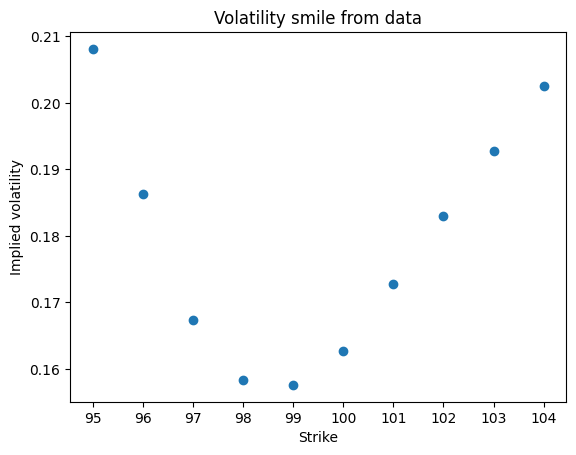

In [5]:
implied_volatilites = []

for i in range(len(prices)):
    implied_volatilites.append(get_implied_vol(100, strikes[i], 1, risk_free_rate, 0.2, prices[i]))

fig, ax = plt.subplots()
ax.set_xlabel("Strike")
ax.set_ylabel("Implied volatility")
ax.set_title("Volatility smile from data")
ax.set_xticks(range(95, 105))
ax.scatter(strikes, implied_volatilites)
plt.show()

## 